In [1]:
# Get the data for expeirment
import sklearn
import pandas as pd 
import numpy as np

from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_squared_error
from scipy.spatial.distance import cdist
from numpy.linalg import pinv
from math import sqrt

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import geopy.distance as distance
from sklearn.preprocessing import MinMaxScaler

import Data_utils
import matplotlib.ticker as ticker
from functools import reduce
from collections import Counter

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import r2_score

import plotly.express as px
import TsModel
import GprModel
from sklearn.utils import validation
from windrose import WindroseAxes
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
import matplotlib.cm as cm

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
# Visualization for all models, used in the paper

In [3]:
plt.rcParams.update({'font.size': 18})

In [117]:
train_x = pd.read_csv('Data/exp/1102_no_precp_full_dataset/9x.csv', index_col=0).to_numpy()
train_y = pd.read_csv('Data/exp/1102_no_precp_full_dataset/9y.csv', index_col=0)['0'].to_numpy().reshape(-1, 1)

test_x = pd.read_csv('Data/exp/1102_no_precp_full_dataset/9x_test.csv', index_col=0).to_numpy()
test_y = pd.read_csv('Data/exp/1102_no_precp_full_dataset/9y_test.csv', index_col=0)['0'].to_numpy().reshape(-1, 1)

In [118]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

train_x, train_y = shuffle(train_x, train_y)

In [119]:
linear_model = LinearRegression().fit(train_x, train_y)

In [141]:
mean_squared_error(train_y, linear_model.predict(train_x), squared=False)

6.451971346143187

In [7]:
# Train the TS model
ts_model = TsModel.TsModel(number_of_rules=30, early_end_threshold=1e-8, fuzzification_coefficient=1.2)
ts_model.fit(train_x,train_y)

FCM training RMSE: 5.398403587581042


(29.14276129440786, 5.398403587581042, 250.59824752807617)

In [76]:
train_x[0]

array([-8.30060272e-01,  8.60324602e-02,  2.58291613e-01,  5.01742817e-01,
       -9.06453864e-01, -6.98157918e-01, -5.80619942e-01, -1.60914456e+00,
        1.09209796e-01, -2.20988446e-01,  4.16260379e-01,  2.70576240e-01,
       -1.27292532e+00, -3.86081059e-01, -8.21966652e-03, -1.99750508e+00,
       -1.42710084e+00, -3.11156974e-01, -1.02888195e+00, -4.33844609e-02,
        7.43582783e-02,  8.17975201e-01, -7.13667198e-01, -1.56045059e-01,
       -9.87397535e-01,  7.83246799e-02,  9.59591501e-02,  9.10758901e-01,
       -9.82583313e-01, -3.85059923e-01, -8.03039220e-01,  1.15315948e+00,
        6.28881000e-02, -1.55351303e-03, -4.07692616e-01, -3.87093093e-01,
       -9.82757702e-01,  2.07082236e+00,  1.03437839e-01,  3.18101500e-01,
       -6.46964392e-01, -1.61771554e+00,  3.39994774e-01, -3.91047394e-01,
        8.96921464e-02, -5.36236410e-01, -9.53875199e-01, -6.69783801e-01,
       -1.35260551e+00,  5.27351035e-01, -1.24638723e-03,  1.02307854e+00,
       -1.15605808e+00, -

In [14]:
# All stations in the dataset
stations_to_test = [
    'LETHBRIDGE CDA',                 
    'EDMONTON STONY PLAIN CS',        
    'CORONATION CLIMATE',             
    'STRATHMORE AGDM',                
    'LLOYDMINSTER',                  
    'MEDICINE HAT RCS',             
    'MILK RIVER',                     
    'CAMROSE',                     
    'BROOKS',                    
    'CLARESHOLM',           
    'ONEFOUR CDA',            
    'VEGREVILLE',             
    'ROCKY MTN HOUSE (AUT)',         
    'LACOMBE CDA 2',              
    'BANFF CS',                     
    'DRUMHELLER EAST',         
    'MEDICINE HAT',                 
    'LETHBRIDGE',                 
    'EDMONTON INTL A',         
    'CALGARY INTL A'
]

In [18]:
def plot_prediction_error(y, y_prediction, station_name):
    
    rmse = np.round(mean_squared_error(y, y_prediction, squared=False),4)
    print(f"{station_name} = {rmse}")

In [21]:
def plot_side_by_side_prediction_error(y, li_y_prediction, ts_prediction, station_name):
    
    plot_prediction_error(y, li_y_prediction, station_name +' with linear regression')
    plot_prediction_error(y, ts_prediction, station_name +' with T-S fuzzy model')    
    
    plt.show()

In [88]:
station = 'LETHBRIDGE CDA'
x = pd.read_csv(f'Data/visualization_data/{station}_x.csv', index_col=0).to_numpy()
y = pd.read_csv(f'Data/visualization_data/{station}_y.csv', index_col=0)['0'].to_numpy().reshape(-1, 1)
gpr_prediction_means,_ = gpr_mdoel.predict(scaler.inverse_transform(x), y)
gpr_prediction = []
for gpr_prediction_means_i in gpr_prediction_means:
    gpr_prediction = np.concatenate((gpr_prediction, gpr_prediction_means_i))
    
print(gpr_prediction.shape)

Root Mean Squared Error: 8.065069480569669
(26715,)


In [22]:
# plots for testing data
test_x = []
test_y = []

for station in stations_to_test:
    # x is already normalized
    x = pd.read_csv(f'Data/visualization_data/{station}_x.csv', index_col=0).to_numpy()
    y = pd.read_csv(f'Data/visualization_data/{station}_y.csv', index_col=0)['0'].to_numpy().reshape(-1, 1)
    
    li_prediction = linear_model.predict(x)
    
    ts_prediction = ts_model.predict(x)
    print(ts_prediction.shape)

    plot_side_by_side_prediction_error(y, li_prediction, ts_prediction, station)


(26715,)
LETHBRIDGE CDA with linear regression = 6.3289
LETHBRIDGE CDA with T-S fuzzy model = 4.9488
(26715,)
EDMONTON STONY PLAIN CS with linear regression = 4.7671
EDMONTON STONY PLAIN CS with T-S fuzzy model = 3.9495
(26715,)
CORONATION CLIMATE with linear regression = 6.2443
CORONATION CLIMATE with T-S fuzzy model = 5.4836
(26715,)
STRATHMORE AGDM with linear regression = 6.2603
STRATHMORE AGDM with T-S fuzzy model = 5.4091
(26715,)
LLOYDMINSTER with linear regression = 6.5575
LLOYDMINSTER with T-S fuzzy model = 5.9478
(26715,)
MEDICINE HAT RCS with linear regression = 5.2728
MEDICINE HAT RCS with T-S fuzzy model = 3.1369
(26715,)
MILK RIVER with linear regression = 7.6984
MILK RIVER with T-S fuzzy model = 7.3265
(26715,)
CAMROSE with linear regression = 4.7539
CAMROSE with T-S fuzzy model = 4.1048
(26715,)
BROOKS with linear regression = 6.5631
BROOKS with T-S fuzzy model = 5.2645
(26715,)
CLARESHOLM with linear regression = 7.6092
CLARESHOLM with T-S fuzzy model = 7.0485
(26715,)

In [121]:
# generate a grid of points for visualization
def generate_grid_points():
    longitude = np.linspace(-110.07, -115.55, 10)
    latitude = np.linspace(49.12, 53.55, 10)
    xx, yy = np.meshgrid(latitude, longitude)
    return np.array(list(zip(xx.flatten(), yy.flatten())))

In [122]:
grid_coor = generate_grid_points()

In [123]:
def find_clostest_n_neighbours(target, unique_stations, number_of_neighbours):
    station_with_locations = unique_stations.copy()

    distances = station_with_locations.apply(
        lambda row: distance.distance(
            [row['latitude'], row['longitude']], [target[0], target[1]]).km,
        axis=1
    )
    station_with_locations['distance'] = distances

    station_in_range = station_with_locations.loc[(station_with_locations['distance'] >= 0)
                                                  & (station_with_locations['distance'] <= 99999)]

    station_to_use = station_in_range.nsmallest(number_of_neighbours, 'distance')
    
    return station_to_use


def extract_data(features, target_coor, features_to_use=None, target_features_to_use=None):
    if features_to_use is None:
        features_to_use = ['latitude', 'longitude', 'temp', 'wind_direction', 'wind_speed']
    if target_features_to_use is None:
        target_features_to_use = ['wind_speed']

    distances = features.apply(
        lambda row: distance.distance(
            [row['latitude'], row['longitude']], [target_coor[0], target_coor[1]]).km,
        axis=1
    )

    processed_features = features.loc[:,features_to_use].copy()
    processed_features['distance'] = distances

    processed_features = processed_features.to_numpy()

    return processed_features


# Note some station will have less data, so the smallest date range is used to mach all stations
def extract_data_match_date_range(features, target_coor, neighbour_station_names):
    processed_features = []

    for name in neighbour_station_names:
        selected_station_data = features.loc[features['name'] == name]
        extracted_features = extract_data(selected_station_data, target_coor)
        if len(processed_features) == 0:
            processed_features = extracted_features
        else:
            processed_features = np.concatenate((processed_features, extracted_features), axis=1)

    return processed_features    

# Given the target station name, find the nearest neighbours within the distance
def generate_data(raw_data, target_coor, number_of_neighbours):

    target_latitude = target_coor[0]
    target_longitude = target_coor[1]

    # select all unique names and coordinates
    unique_stations = raw_data.groupby('name').head(1)

    neighbour_stations = find_clostest_n_neighbours([target_latitude, target_longitude], unique_stations, number_of_neighbours)

    # find k nearest neighbours
    neighbour_station_names = neighbour_stations['name']

    # filter the data, return
    features = raw_data[raw_data['name'].isin(neighbour_station_names)]
    features = extract_data_match_date_range(features, target_coor, neighbour_station_names)

    return features


In [124]:
grid_df = pd.read_csv('Data/processed_ab_no_precp_train.txt')
latest_one_month_records = grid_df.sort_values('date', ascending=False).head(20*300)


C:\Users\PPL\AppData\Local\Temp\ipykernel_11388\2452982092.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  grid_df = pd.read_csv('Data/processed_ab_no_precp_train.txt')


In [125]:
latest_one_month_records['date'].unique()

array(['2023-09-14 20:00', '2023-09-14 19:00', '2023-09-14 18:00',
       '2023-09-14 07:00', '2023-09-14 06:00', '2023-09-14 05:00',
       '2023-09-14 04:00', '2023-09-14 03:00', '2023-09-14 01:00',
       '2023-09-13 20:00', '2023-09-13 17:00', '2023-09-13 16:00',
       '2023-09-13 15:00', '2023-09-13 13:00', '2023-09-13 12:00',
       '2023-09-13 10:00', '2023-09-13 09:00', '2023-09-13 08:00',
       '2023-09-13 07:00', '2023-09-13 05:00', '2023-09-13 03:00',
       '2023-09-13 02:00', '2023-09-12 18:00', '2023-09-12 17:00',
       '2023-09-12 16:00', '2023-09-12 15:00', '2023-09-11 22:00',
       '2023-09-11 20:00', '2023-09-11 19:00', '2023-09-11 18:00',
       '2023-09-11 17:00', '2023-09-11 16:00', '2023-09-11 15:00',
       '2023-09-11 14:00', '2023-09-11 12:00', '2023-09-11 11:00',
       '2023-09-11 09:00', '2023-09-11 07:00', '2023-09-11 06:00',
       '2023-09-11 04:00', '2023-09-11 03:00', '2023-09-11 02:00',
       '2023-09-11 01:00', '2023-09-10 20:00', '2023-09-10 17:

In [126]:
linear_grid_predicitions = []
ts_grid_predicitions = []
test_scaler = StandardScaler()

grid_input_data = []

for coor in grid_coor:
    input_feature = generate_data(latest_one_month_records, coor, 9)
    #input_feature = scaler.transform(input_feature)
    if len(grid_input_data) == 0:
        grid_input_data = input_feature
    else:
        grid_input_data = np.concatenate((grid_input_data, input_feature), axis=0)

grid_input_data_scaled = test_scaler.fit_transform(grid_input_data)

In [127]:
# Model predicitons
ts_prediction = ts_model.predict(grid_input_data_scaled)

# linear model
linear_prediction = linear_model.predict(grid_input_data_scaled)

In [128]:
linear_grid_predicitions_avg = np.mean(linear_prediction.reshape(10,10,300), axis=2)
ts_grid_predicitions_avg = np.mean(ts_prediction.reshape(10,10,300), axis=2)

<a list of 12 text.Text objects>

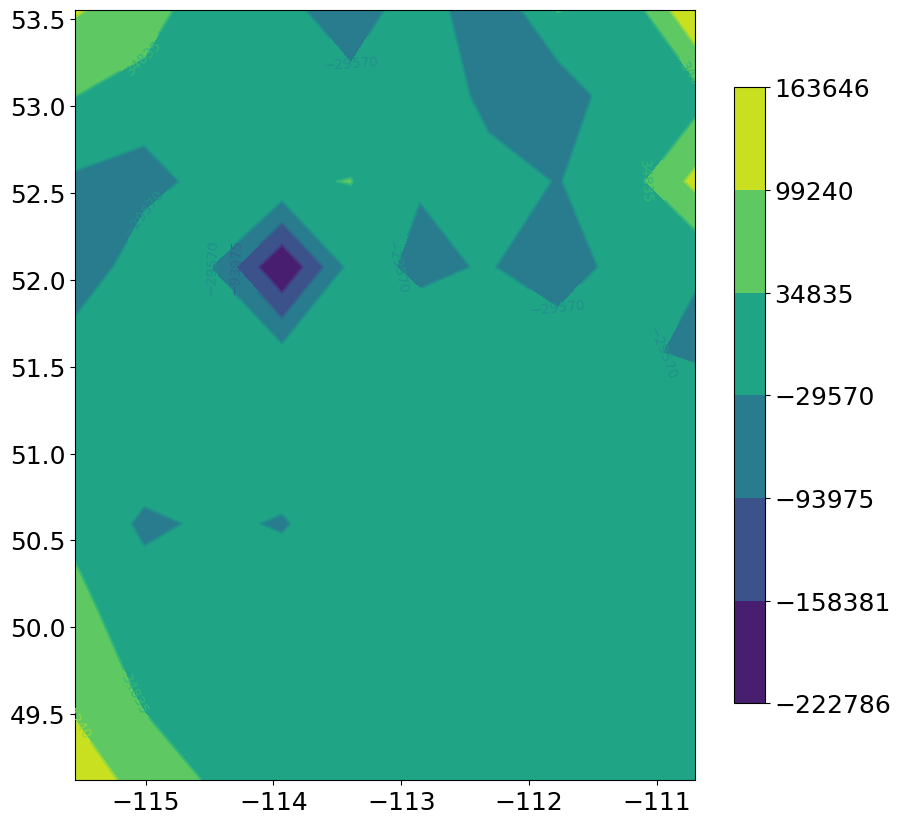

In [139]:
levels = np.linspace(np.min(ts_grid_predicitions_avg), np.max(ts_grid_predicitions_avg), 7)

longitude = np.linspace(-110.7, -115.55, 10)
latitude = np.linspace(49.12, 53.55, 10)
xx, yy = np.meshgrid(latitude, longitude)

z = ts_grid_predicitions_avg

fig, ax = plt.subplots(figsize=(10,10))

cs = ax.contour(yy, xx, z,levels=levels)
cf = plt.contourf(yy, xx, z,levels=levels)
CB = fig.colorbar(cf, shrink=0.8)
ax.clabel(cs, inline=True, fontsize=10)

<a list of 9 text.Text objects>

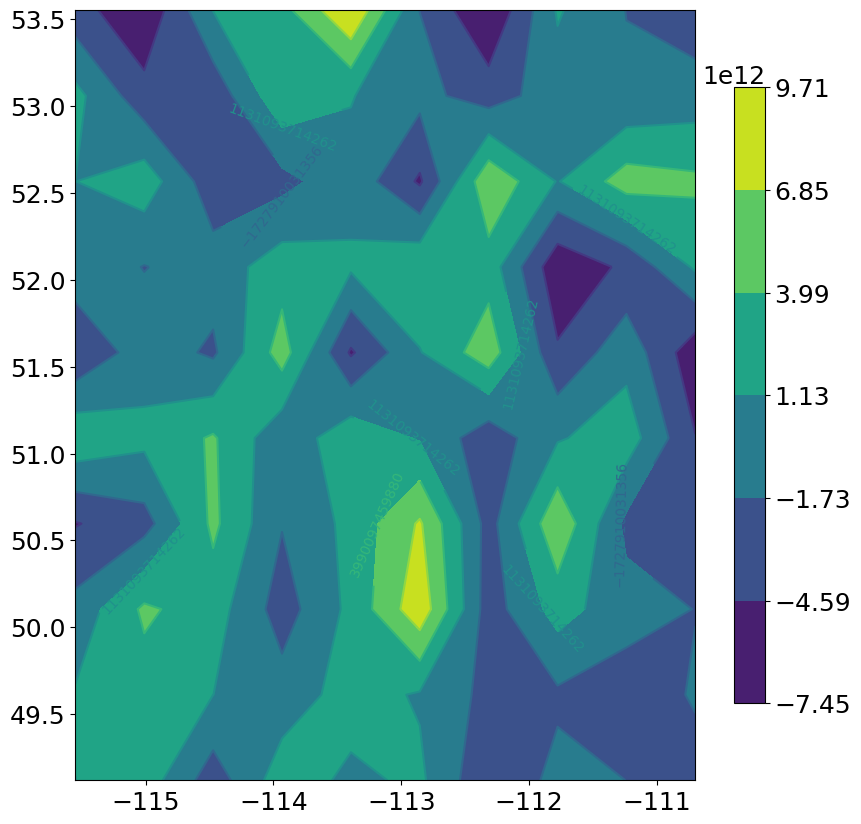

In [134]:
levels = np.linspace(np.min(linear_grid_predicitions_avg), np.max(linear_grid_predicitions_avg), 7)

longitude = np.linspace(-110.7, -115.55, 10)
latitude = np.linspace(49.12, 53.55, 10)
xx, yy = np.meshgrid(latitude, longitude)

z = linear_grid_predicitions_avg

fig, ax = plt.subplots(figsize=(10,10))
cs = ax.contour(yy, xx, z,levels=levels)
cf = plt.contourf(yy, xx, z,levels=levels)
CB = fig.colorbar(cf, shrink=0.8)
ax.clabel(cs, inline=True, fontsize=10)